<h4> Calculați emoția textului generat</h4>

<h1>Importuri</h1>

In [1]:
import numpy as np
import pandas as pd
import os
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

<h1>Citirea datelor</h1>

In [2]:
from datasets import load_dataset

dataset = load_dataset("biglam/gutenberg-poetry-corpus")
train_data = dataset["train"]

C:\Users\ariis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("Numărul de linii =", len(train_data))
print(train_data[:4])

Numărul de linii = 3085117
{'line': ['The Song of Hiawatha is based on the legends and stories of', 'many North American Indian tribes, but especially those of the', 'Ojibway Indians of northern Michigan, Wisconsin, and Minnesota.', 'They were collected by Henry Rowe Schoolcraft, the reknowned'], 'gutenberg_id': [19, 19, 19, 19]}


<h1>Cleaning DataSet</h1>

In [4]:
train_data.features

{'line': Value(dtype='string', id=None),
 'gutenberg_id': Value(dtype='int64', id=None)}

In [5]:
def clean_text(text):
    cleaned_text = []
    for example in text:
        poem_text = example["line"]  # Accesează textul poeziei din exemplu
        poem_text = poem_text.lower()
        poem_text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", poem_text)
        tokens = word_tokenize(poem_text)
        words = [word for word in tokens if word.isalpha()]
        cleaned_text.extend(words)
    return cleaned_text

cleaned_poetry = clean_text(train_data)
print("Numărul de cuvinte =", len(cleaned_poetry))
print(cleaned_poetry[:50])

Numărul de cuvinte = 21740946
['the', 'song', 'of', 'hiawatha', 'is', 'based', 'on', 'the', 'legends', 'and', 'stories', 'of', 'many', 'north', 'american', 'indian', 'tribes', 'but', 'especially', 'those', 'of', 'the', 'ojibway', 'indians', 'of', 'northern', 'michigan', 'wisconsin', 'and', 'minnesota', 'they', 'were', 'collected', 'by', 'henry', 'rowe', 'schoolcraft', 'the', 'reknowned', 'schoolcraft', 'married', 'jane', 'the', 'fur', 'trader', 'and', 'the', 'woman', 'of', 'the']


In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

<h1>Eliminam stop_words din poezie, deoarece sunt lipsite de emotie</h1>

In [7]:
final_words = []
for word in cleaned_poetry:
    if word not in stop_words:
        final_words.append(word)
print(final_words[:30])

['song', 'hiawatha', 'based', 'legends', 'stories', 'many', 'north', 'american', 'indian', 'tribes', 'especially', 'ojibway', 'indians', 'northern', 'michigan', 'wisconsin', 'minnesota', 'collected', 'henry', 'rowe', 'schoolcraft', 'reknowned', 'schoolcraft', 'married', 'jane', 'fur', 'trader', 'woman', 'green', 'prairie']


<h1>Citim datele de emotie din emotion.txt si cautam emotiile in poezie</h1>

In [9]:
emotion_list = []
with open('emotion.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)

In [22]:
from collections import Counter

w = Counter(emotion_list)
print(w)

Counter({' sad': 67, ' happy': 62, ' fearful': 43, ' angry': 31, ' attracted': 29, ' powerless': 21, ' singled out': 15, ' fearless': 14, ' hated': 14, ' anxious': 14, ' attached': 12, ' cheated': 11, ' entitled': 11, ' belittled': 10, ' esteemed': 9, ' adequate': 9, ' apathetic': 8, ' alone': 8, ' loved': 7, ' lustful': 7, ' surprise': 6, ' demoralized': 6, ' free': 5, ' bored': 4, ' independent': 4, ' codependent': 4, ' embarrassed': 3, ' average': 3, ' obsessed': 3, ' focused': 3, ' ecstatic': 3, ' safe': 2, ' derailed': 2, ' lost': 2, ' burdened': 1})


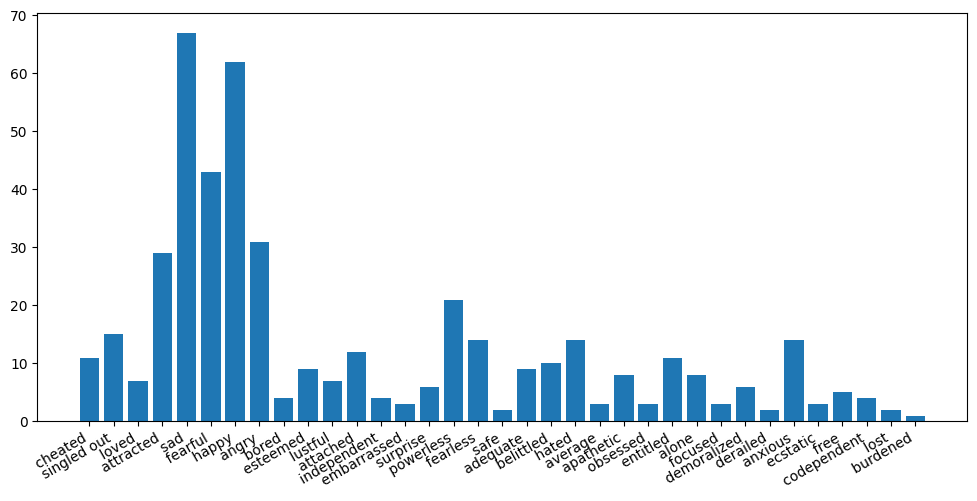

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.show()